<a href="https://colab.research.google.com/github/protocol-streams/research/blob/main/blip2_instructed_generation(Needs%20GPU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Large RAM is required to load the larger models. Running on GPU can optimize inference speed.

In [ ]:

# !python --version
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
# !sudo update-alternatives --config python3


# !python3 --version
# !sudo apt install python3-pip

In [ ]:



import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip install salesforce-lavis

In [ ]:
!pip list

In [2]:
#!pip install salesforce-lavis
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd drive/MyDrive/Test_Videos/paris_output/

/content/drive/MyDrive/Test_Videos/paris_output


#### Load an example image

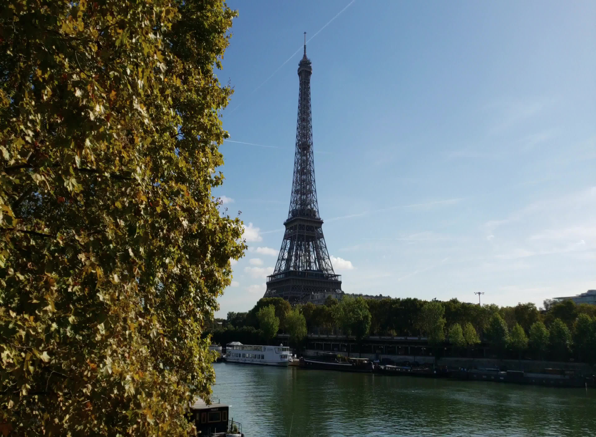

In [8]:
#img_url = 'https://storage.googleapis.com/sfr-vision-language-research/LAVIS/assets/merlion.png' 
#raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   
file_path = 'frame-0001.jpg'

# Open the image and convert to RGB
raw_image = Image.open(file_path).convert('RGB')
display(raw_image.resize((596, 437)))

In [4]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

#### Load pretrained/finetuned BLIP2 captioning model

In [9]:
# we associate a model with its preprocessors to make it easier for inference.
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xxl", is_eval=True, device=device
# )
# loads BLIP caption base model, with finetuned checkpoints on MSCOCO captioning dataset.
# this also loads the associated image processors
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="base_coco", is_eval=True, device=device)
# preprocess the image
# vis_processors stores image transforms for "train" and "eval" (validation / testing / inference)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
model.generate({"image": image})
# Other available models:
# 
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt6.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt6.7b", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device
# )

#vis_processors.keys()

['a view of the eiffel tower from across the river']

#### prepare the image as model input using the associated processors

In [ ]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### generate caption using beam search

In [ ]:
model.generate({"image": image})

#### generate multiple captions using nucleus sampling

In [ ]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

#### instructed zero-shot vision-to-language generation

In [ ]:
model.generate({"image": image, "prompt": "Question: which city is this? Answer:"})

['singapore']

In [ ]:
model.generate({
    "image": image,
    "prompt": "Question: which city is this? Answer: singapore. Question: why?"})

['it has a statue of a merlion']

In [ ]:
context = [
    ("which city is this?", "singapore"),
    ("why?", "it has a statue of a merlion"),
]
question = "where is the name merlion coming from?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

Question: which city is this? Answer: singapore. Question: why? Answer: it has a statue of a merlion. Question: where is the name merlion coming from? Answer:


In [ ]:
model.generate(
    {
    "image": image,
    "prompt": prompt
    },
    use_nucleus_sampling=False,
)

['merlion is a portmanteau of mermaid and lion']